In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [2]:
df = pd.read_csv("churn_prediction.csv")
df.shape

(28382, 21)

In [3]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [5]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_291"; Java(TM) SE Runtime Environment (build 1.8.0_291-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/47/pldcybnn7h75bn3bpyp20fxm0000gn/T/tmpywx7p8c_
  JVM stdout: /var/folders/47/pldcybnn7h75bn3bpyp20fxm0000gn/T/tmpywx7p8c_/h2o_wassimsuleiman_started_from_python.out
  JVM stderr: /var/folders/47/pldcybnn7h75bn3bpyp20fxm0000gn/T/tmpywx7p8c_/h2o_wassimsuleiman_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_wassimsuleiman_jcjv6z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.778 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
# Load data from CSV
data = h2o.import_file('churn_prediction.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
data.head()

customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
1,2101,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.2,0.2,0.2,0.2,1458.71,1458.71,0,2019-05-21 00:00:00
2,2348,35,Male,0,self_employed,nan,2,3214,5390.37,8704.66,7799.26,12419.4,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01 00:00:00
4,2194,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,
5,2329,90,,nan,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06 00:00:00
6,1579,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03 00:00:00
7,1923,42,Female,0,self_employed,1096,2,1666,15202.2,16059.3,15211.3,13798.8,0.36,0.36,857.5,286.07,15719.4,15349.8,0,2019-11-01 00:00:00
8,2048,72,Male,0,retired,1020,1,1,7006.93,7714.19,7859.74,11232.4,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24 00:00:00
9,2009,46,Male,0,self_employed,623,2,317,10096.6,8519.53,6511.82,16314.2,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12 00:00:00
10,2053,31,Male,0,salaried,1096,2,4110,1355.86,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12 00:00:00
11,2295,40,Male,3,self_employed,1020,2,38,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.3,1348.85,1823.16,2416.69,0,2019-12-31 00:00:00


In [8]:
# Split data into train and testing
train, test = data.split_frame(ratios=[0.8])

In [9]:
# Output parameter train against input parameters
response_column = 'churn'

In [16]:
# Input parameters that are going to train
training_columns = list(df.columns)

In [17]:
training_columns

['customer_id',
 'vintage',
 'age',
 'gender',
 'dependents',
 'occupation',
 'city',
 'customer_nw_category',
 'branch_code',
 'current_balance',
 'previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance',
 'churn',
 'last_transaction']

In [18]:
training_columns = training_columns.remove(response_column)

## No enhancement 

In [19]:
# Define model
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)

# Train model
model.train(x=training_columns, y=response_column, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [24]:
# Model performance
performance = model.model_performance(test_data=test)

print (performance)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.10489723779148498
RMSE: 0.32387843057462934
MAE: 0.22219857541604135
RMSLE: 0.2276860838244122
Mean Residual Deviance: 0.10489723779148498



In [25]:
performance.show()


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.10489723779148498
RMSE: 0.32387843057462934
MAE: 0.22219857541604135
RMSLE: 0.2276860838244122
Mean Residual Deviance: 0.10489723779148498


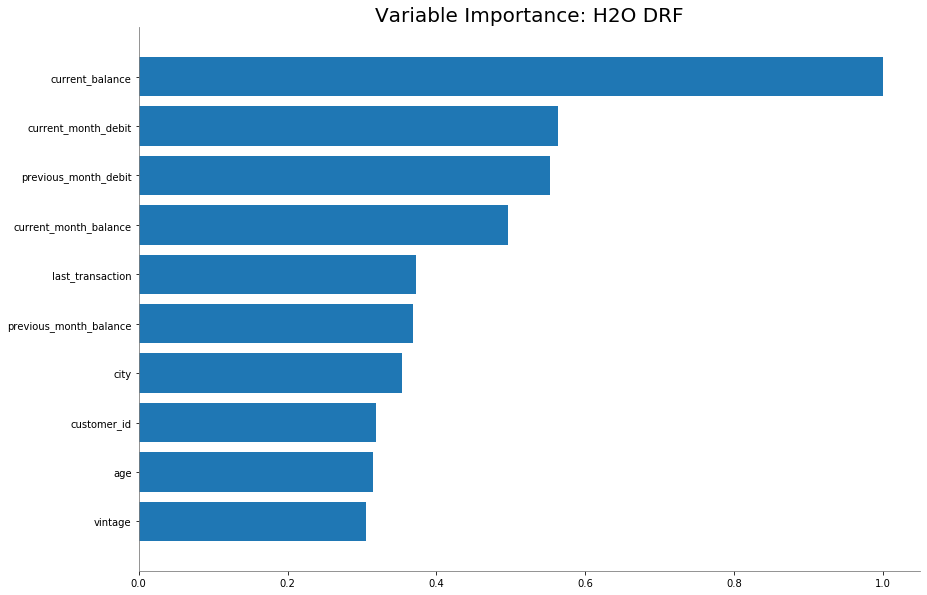

In [23]:
model.varimp_plot()